In [288]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup, Tag, NavigableString
from selenium import webdriver
from datetime import datetime,date

<html lang="en"><!--<![endif]--><head><script src="https://m.addthis.com/live/red_lojson/300lo.json?si=6132339341621199&amp;bkl=0&amp;bl=1&amp;pdt=3396&amp;sid=6132339341621199&amp;pub=ra-54615fa823b2af68&amp;rev=v8.28.8-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.worldometers.info&amp;fp=coronavirus%2F&amp;fr=&amp;of=0&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;colc=1630679958839&amp;jsl=4097&amp;uvs=61323393fee0f272000&amp;skipb=1&amp;callback=addthis.cbs.jsonp__52702647294586940" type="text/javascript"></script><script src="https://v1.addthisedge.com/live/boost/ra-54615fa823b2af68/_ate.track.config_resp" type="text/javascript"></script><script src="https://pagead2.googlesyndication.com/pagead/managed/js/adsense/m202109010101/reactive_library_fy2019.js"></script><script async="" src="https://rules.quantcount.com/rules-p-Pd9JxUkvV0m7q.js"></script><script src="https://www.googletagservices.com/a
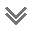

In [289]:
url='https://www.worldometers.info/coronavirus/'
path='C:\\Users\\adila\\chromedriver_win32\\chromedriver.exe'
driver=webdriver.Chrome(executable_path=path)
driver.get(url)
webcontent=driver.page_source
soup=BeautifulSoup(webcontent,'lxml')
driver.quit()
soup

In [290]:
raw_data=soup.find('table',id="main_table_countries_today")
raw_data

<table class="table table-bordered table-hover main_table_countries dataTable no-footer" id="main_table_countries_today" style="width: 100%; margin-top: 0px !important;">
<thead>
<tr role="row"><th aria-label="#" class="sorting_disabled" colspan="1" rowspan="1" style="width: 21px;" width="1%">#</th><th aria-controls="main_table_countries_today" aria-label="Country,Other: activate to sort column ascending" class="sorting" colspan="1" rowspan="1" style="width: 100px;" tabindex="0" width="100">Country,<br/>Other</th><th aria-controls="main_table_countries_today" aria-label="TotalCases: activate to sort column ascending" aria-sort="descending" class="sorting_desc" colspan="1" rowspan="1" style="width: 65px;" tabindex="0" width="20">Total<br/>Cases</th><th aria-controls="main_table_countries_today" aria-label="NewCases: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 44px;" tabindex="0" width="30">New<br/>Cases</th><th aria-controls="main_table_coun

In [291]:
date=soup.find('div',style="font-size:13px; color:#999; margin-top:5px; text-align:center").text.split(':')[1][0:19].strip()
date=date.replace(',','')
date

'September 03 2021'

In [292]:
format='%B %d %Y'
datetime_obj=datetime.strptime(date,format).date()
datetime_obj

datetime.date(2021, 9, 3)

In [293]:
raw_data=raw_data.tr.find_all('th')
raw_data

[<th aria-label="#" class="sorting_disabled" colspan="1" rowspan="1" style="width: 21px;" width="1%">#</th>,
 <th aria-controls="main_table_countries_today" aria-label="Country,Other: activate to sort column ascending" class="sorting" colspan="1" rowspan="1" style="width: 100px;" tabindex="0" width="100">Country,<br/>Other</th>,
 <th aria-controls="main_table_countries_today" aria-label="TotalCases: activate to sort column ascending" aria-sort="descending" class="sorting_desc" colspan="1" rowspan="1" style="width: 65px;" tabindex="0" width="20">Total<br/>Cases</th>,
 <th aria-controls="main_table_countries_today" aria-label="NewCases: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 44px;" tabindex="0" width="30">New<br/>Cases</th>,
 <th aria-controls="main_table_countries_today" aria-label="TotalDeaths: activate to sort column descending" class="sorting" colspan="1" rowspan="1" style="width: 47px;" tabindex="0" width="30">Total<br/>Deaths</th>,

In [294]:

for i in raw_data:
    print(i.text)

#
Country,Other
TotalCases
NewCases
TotalDeaths
NewDeaths
TotalRecovered
NewRecovered
ActiveCases
Serious,Critical
Tot Cases/1M pop
Deaths/1M pop
TotalTests
Tests/
1M pop

Population
Continent


In [295]:
heading=[]
for i in raw_data:
    heading.append(i.text)

In [310]:
heading[13]='Tests/1M pop'

In [331]:
del heading[0]

In [332]:
heading

['Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Total Cases/1 Million population',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/1M pop',
 'Population',
 'Continent']

In [312]:
table_data=soup.tbody.find_all('tr')
table_data

[<tr class="total_row_world odd" role="row">
 <td></td>
 <td style="text-align:left;">World</td>
 <td class="sorting_1">220,180,622</td>
 <td>+256,447</td>
 <td>4,560,989</td>
 <td>+5,162</td>
 <td>196,841,717</td>
 <td>+279,031</td>
 <td>18,777,916</td>
 <td>105,715</td>
 <td>28,247</td>
 <td>585.1</td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="all" style="display:none">All</td>
 </tr>,
 <tr class="total_row_world row_continent even" data-continent="Asia" role="row" style="display: none">
 <td></td>
 <td style="text-align:left;">
 <nobr>Asia</nobr>
 </td>
 <td class="sorting_1">70,801,137</td>
 <td>+166,527</td>
 <td>1,046,146</td>
 <td>+2,886</td>
 <td>66,062,868</td>
 <td>+185,488</td>
 <td>3,692,123</td>
 <td>41,258</td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td></td>
 <td data-continent="Asia" style="display:none;">Asia</td>
 </tr>,
 <tr class="total_row_world row_continent odd" data-continent="Europe" role="row" style="display: none">
 <td></td>
 <td style="tex

In [320]:
dct={}
for i in range(len(table_data)):
    try:
        keys=table_data[i].find_all("a",href=True)[0].string
    except:
        keys=table_data[i].find_all("td")[0].string
    values=[j.string for j in table_data[i].find_all('td')]
    dct[keys]=values
print(dct)


{None: [None, None, '721', None, '15', None, '706', None, '0', '0', None, None, None, None, None, None], 'USA': ['1', 'USA', '40,520,784', '+7,766', '662,945 ', '+92', '31,201,272', '+1,437', '8,656,567', '25,656', '121,584', '1,989', '588,598,687', '1,766,115', None, 'North America'], 'India': ['2', 'India', '32,908,089', '+5,744', '439,965 ', '+49', '32,063,616', '+7,531', '404,508', '8,944', '23,575', '315', '526,535,068', '377,211', None, 'Asia'], 'Brazil': ['3', 'Brazil', '20,830,712', None, '582,004 ', None, '19,801,725', None, '446,983', '8,318', '97,191', '2,716', '56,897,224', '265,470', None, 'South America'], 'Russia': ['4', 'Russia', '6,975,174', '+18,856', '185,611 ', '+799', '6,236,738', '+18,690', '552,825', '2,300', '47,773', '1,271', '180,000,000', '1,232,812', None, 'Europe'], 'UK': ['5', 'UK', '6,862,904', None, '132,920 ', None, '5,533,227', None, '1,196,757', '1,030', '100,477', '1,946', '271,963,982', '3,981,717', None, 'Europe'], 'France': ['6', 'France', '6,799,

In [328]:
pd.DataFrame(dct).iloc[1:,:].T[1:]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
USA,USA,"40,520,784","+7,766","662,945",+92,"31,201,272","+1,437","8,656,567","25,656","121,584","1,989","588,598,687","1,766,115",None,North America
India,India,"32,908,089","+5,744","439,965",+49,"32,063,616","+7,531","404,508","8,944","23,575",315,"526,535,068","377,211",None,Asia
Brazil,Brazil,"20,830,712",None,"582,004",None,"19,801,725",None,"446,983","8,318","97,191","2,716","56,897,224","265,470",None,South America
Russia,Russia,"6,975,174","+18,856","185,611",+799,"6,236,738","+18,690","552,825","2,300","47,773","1,271","180,000,000","1,232,812",None,Europe
UK,UK,"6,862,904",None,"132,920",None,"5,533,227",None,"1,196,757","1,030","100,477","1,946","271,963,982","3,981,717",None,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,Marshall Islands,4,None,,None,4,None,0,None,67,None,None,None,None,Australia/Oceania
Samoa,Samoa,3,None,,None,3,None,0,None,15,None,None,None,None,Australia/Oceania
"18,195",Palau,2,None,,None,1,None,1,None,110,None,"9,304","511,349",None,Australia/Oceania
Saint Helena,Saint Helena,2,None,,None,2,None,0,None,328,None,None,None,None,Africa


In [333]:
countries_covid_data=pd.DataFrame(dct).iloc[1:,:].T[1:]


In [337]:
countries_covid_data.columns=heading
countries_covid_data.drop(axis=1,labels='Population',inplace=True)

In [338]:
countries_covid_data

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Total Cases/1 Million population,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
USA,USA,"40,520,784","+7,766","662,945",+92,"31,201,272","+1,437","8,656,567","25,656","121,584","1,989","588,598,687","1,766,115",North America
India,India,"32,908,089","+5,744","439,965",+49,"32,063,616","+7,531","404,508","8,944","23,575",315,"526,535,068","377,211",Asia
Brazil,Brazil,"20,830,712",None,"582,004",None,"19,801,725",None,"446,983","8,318","97,191","2,716","56,897,224","265,470",South America
Russia,Russia,"6,975,174","+18,856","185,611",+799,"6,236,738","+18,690","552,825","2,300","47,773","1,271","180,000,000","1,232,812",Europe
UK,UK,"6,862,904",None,"132,920",None,"5,533,227",None,"1,196,757","1,030","100,477","1,946","271,963,982","3,981,717",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,Marshall Islands,4,None,,None,4,None,0,None,67,None,None,None,Australia/Oceania
Samoa,Samoa,3,None,,None,3,None,0,None,15,None,None,None,Australia/Oceania
"18,195",Palau,2,None,,None,1,None,1,None,110,None,"9,304","511,349",Australia/Oceania
Saint Helena,Saint Helena,2,None,,None,2,None,0,None,328,None,None,None,Africa


In [346]:
countries_covid_data.index = countries_covid_data.iloc[:,0].values
countries_covid_data.drop(axis=1,labels='Country,Other',inplace=True)
countries_covid_data

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Total Cases/1 Million population,Deaths/1M pop,TotalTests,Tests/1M pop,Continent
USA,"40,520,784","+7,766","662,945",+92,"31,201,272","+1,437","8,656,567","25,656","121,584","1,989","588,598,687","1,766,115",North America
India,"32,908,089","+5,744","439,965",+49,"32,063,616","+7,531","404,508","8,944","23,575",315,"526,535,068","377,211",Asia
Brazil,"20,830,712",None,"582,004",None,"19,801,725",None,"446,983","8,318","97,191","2,716","56,897,224","265,470",South America
Russia,"6,975,174","+18,856","185,611",+799,"6,236,738","+18,690","552,825","2,300","47,773","1,271","180,000,000","1,232,812",Europe
UK,"6,862,904",None,"132,920",None,"5,533,227",None,"1,196,757","1,030","100,477","1,946","271,963,982","3,981,717",Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,4,None,,None,4,None,0,None,67,None,None,None,Australia/Oceania
Samoa,3,None,,None,3,None,0,None,15,None,None,None,Australia/Oceania
Palau,2,None,,None,1,None,1,None,110,None,"9,304","511,349",Australia/Oceania
Saint Helena,2,None,,None,2,None,0,None,328,None,None,None,Africa


In [ ]:
countries_covid_data.to_csv('countries_covid_data.csv')

In [ ]:
countries_covid_data.fillna(value='0',inplace=True) # fill null values with 0

In [ ]:
int(countries_covid_data['TotalCases'][0].replace(',',''))

In [ ]:
df=countries_covid_data.copy()

In [ ]:
int_col=df.columns[:-1]

In [ ]:
for col in df:
    df[col]=[i.replace(',','') for i in df[col]]

In [ ]:
df=df.replace(' ',0) # Many blank values

In [1]:
#Remove values containg no value at total test and other important columns

In [ ]:
to_remove=['Marshall Islands','Samoa','Micronesia','Western Sahara','MS Zaandam','Vatican City','Diamond Princess','Tanzania','Peru']

In [ ]:
df.drop(axis=0,labels=to_remove,inplace=True) 
df

In [ ]:
df.dtypes

In [ ]:
#Convert numerical columns to integer data type

In [ ]:
for i in df[int_col]:
    df[i]=df[i].astype(int)

In [ ]:
df.dtypes

In [ ]:
df.to_csv('World Covid data Cleaned.csv')